In [1]:
# import the modules
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

df_train=pd.read_csv("train.csv")
df_train.head()


,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,Calendar,2018,Community Health,NaN,"Prof & Tech Eng, Local 21",Information Systems,IS Business Analyst-Principal,8594384,$0.0,$13527.66,$0.0,0.00
1,1,Calendar,2014,"Public Works, Transportation & Commerce",MTA Municipal Transprtn Agncy,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Publ Svc Aide-Asst To Prof,22142,$0.0,$3995.56,$875.27,16176.35
2,2,Fiscal,2018,General City Responsibilities,NaN,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",Senior Account Clerk,8512172,$0.0,$0.0,$0.0,248.30
3,3,Fiscal,2015,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,Sr Materials & Supplies Sprv,47593,$11671.59,$10680.55,$4400.24,80020.86
4,4,Fiscal,2014,Community Health,DPH Public Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,Medical Records Technician,47549,$14617.66,$12464.61,$5562.09,101207.38


In [2]:
df_train.corr()

,Id,Year,Employee Identifier,Total Compensation
Id,1.000000,0.002284,0.001306,0.001243
Year,0.002284,1.000000,0.807132,-0.050990
Employee Identifier,0.001306,0.807132,1.000000,-0.162666
Total Compensation,0.001243,-0.050990,-0.162666,1.000000


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Id                   567103 non-null  int64  
 1   Year Type            567103 non-null  object 
 2   Year                 567103 non-null  int64  
 3   Organization Group   567103 non-null  object 
 4   Department           272038 non-null  object 
 5   Union                566758 non-null  object 
 6   Job Family           567103 non-null  object 
 7   Job                  567100 non-null  object 
 8   Employee Identifier  567103 non-null  int64  
 9   Retirement           567103 non-null  object 
 10  Health and Dental    567103 non-null  object 
 11  Other Benefits       567103 non-null  object 
 12  Total Compensation   567103 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 36.8+ MB


In [4]:
df_train[df_train['Year Type']=='Calendar']

,Id,Year Type,Year,Organization Group,Department,Union,Job Family,Job,Employee Identifier,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,Calendar,2018,Community Health,NaN,"Prof & Tech Eng, Local 21",Information Systems,IS Business Analyst-Principal,8594384,$0.0,$13527.66,$0.0,0.00
1,1,Calendar,2014,"Public Works, Transportation & Commerce",MTA Municipal Transprtn Agncy,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Publ Svc Aide-Asst To Prof,22142,$0.0,$3995.56,$875.27,16176.35
5,5,Calendar,2016,Public Protection,JUV Juvenile Probation,"SEIU - Miscellaneous, Local 1021","Clerical, Secretarial & Steno",Transcriber Typist,9836,$0.0,$98.16,$940.57,13333.73
7,7,Calendar,2016,Human Welfare & Neighborhood Development,HSA Human Services Agency,"SEIU - Miscellaneous, Local 1021",Public Service Aide,Public Service Trainee,47063,$0.0,$4721.32,$857.15,16026.03
8,8,Calendar,2017,General City Responsibilities,NaN,"SEIU, Local 1021, Misc","Clerical, Secretarial & Steno",Secretary 2,8586840,$0.0,$5432.36,$0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
567092,567092,Calendar,2013,"Public Works, Transportation & Commerce",PUB Public Utilities Bureaus,"SEIU - Miscellaneous, Local 1021",Public Service Aide,PS Aide To Prof,34121,$0.0,$4760.61,$1147.02,20723.20
567093,567093,Calendar,2018,General City Responsibilities,NaN,"SEIU, Local 1021, Misc","Clerical, Secretarial & Steno",Principal Clerk,8531376,$4409.63,$24449.54,$1814.23,39086.25
567097,567097,Calendar,2014,Public Protection,FIR Fire Department,"Firefighters - Miscellaneous, Local 798",Fire Services,Firefighter,41187,$26189.14,$15816.56,$2102.67,176050.44
567100,567100,Calendar,2018,Public Protection,NaN,"Firefighters,Local 798, Unit 1",Fire Services,EMT/Paramedic/Firefighter,8547769,$0.0,$4617.42,$0.0,0.00


In [5]:
df_train.isnull().sum()

Id                          0
Year Type                   0
Year                        0
Organization Group          0
Department             295065
Union                     345
Job Family                  0
Job                         3
Employee Identifier         0
Retirement                  0
Health and Dental           0
Other Benefits              0
Total Compensation          0
dtype: int64

In [6]:
df_train.drop(["Id","Department",'Job',"Employee Identifier"],axis=1,inplace=True)
#df_train.drop(["Id","Department",'Job',"Employee Identifier","Other Benefits"],axis=1,inplace=True)

In [7]:
df_train.head()

,Year Type,Year,Organization Group,Union,Job Family,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2018,Community Health,"Prof & Tech Eng, Local 21",Information Systems,$0.0,$13527.66,$0.0,0.00
1,Calendar,2014,"Public Works, Transportation & Commerce","SEIU - Miscellaneous, Local 1021",Public Service Aide,$0.0,$3995.56,$875.27,16176.35
2,Fiscal,2018,General City Responsibilities,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",$0.0,$0.0,$0.0,248.30
3,Fiscal,2015,Community Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,$11671.59,$10680.55,$4400.24,80020.86
4,Fiscal,2014,Community Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,$14617.66,$12464.61,$5562.09,101207.38


In [8]:
df_train.isnull().sum()

Year Type               0
Year                    0
Organization Group      0
Union                 345
Job Family              0
Retirement              0
Health and Dental       0
Other Benefits          0
Total Compensation      0
dtype: int64

In [9]:
df_train['Union'].value_counts()

SEIU, Local 1021, Misc                             112750
SEIU - Miscellaneous, Local 1021                    77191
Prof & Tech Eng, Local 21                           44686
Prof & Tech Engineers - Miscellaneous, Local 21     34860
SEIU - Staff and Per Diem Nurses, Local 1021        20507
                                                    ...  
SEIU - Firefighter Paramedics, Local 1021              21
Building Inspects - 6332                               20
SEIU, Local 1021, H-1                                  18
Municipal Exec Assoc-Misc                              14
SF Courts Commissioner Assoc                           13
Name: Union, Length: 121, dtype: int64

### Define the following functions as per the description, so that they can be called later to perform the tasks.

In [10]:
# to treat missing values

def treat_null_values(df):
    """Treats the missing values in the dataframe.
    
    This function accepts a dataframe and the method to treat the missing value.
    Depending on the method passed, impute/drop the missing values.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to treat the missing values
    """
    df['Union'].fillna(df_train.Union.mode(), inplace=True)
treat_null_values(df_train)    
df_train.isnull().sum()

Year Type               0
Year                    0
Organization Group      0
Union                 345
Job Family              0
Retirement              0
Health and Dental       0
Other Benefits          0
Total Compensation      0
dtype: int64

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year Type           567103 non-null  object 
 1   Year                567103 non-null  int64  
 2   Organization Group  567103 non-null  object 
 3   Union               566758 non-null  object 
 4   Job Family          567103 non-null  object 
 5   Retirement          567103 non-null  object 
 6   Health and Dental   567103 non-null  object 
 7   Other Benefits      567103 non-null  object 
 8   Total Compensation  567103 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 23.8+ MB


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data and apply some data preprocessing techniques

In [12]:

# to seperate the numerical and categorical columns

def num_and_cat_columns(df):
    """Return seperate list of numerical & categorical columns.
    
    This function accepts a dataframe and returns two lists,
    one containing the names of numerical columns(num_cols) and the other categorical columns(cat_cols).
        
    Keyword arguments:
    df -- pandas dataframe for which we want the list of columns
    
    Returns:
    num_cols -- list of numerical columns
    cat_cols -- list of categorical columns
    """
    num_cols=df.select_dtypes(include=np.number).columns
    cat_cols=df.select_dtypes(exclude=np.number).columns
    return num_cols,cat_cols
num_cols,cat_cols=num_and_cat_columns(df_train)    
print(num_cols)
print(cat_cols)
    
    

Index(['Year', 'Total Compensation'], dtype='object')
Index(['Year Type', 'Organization Group', 'Union', 'Job Family', 'Retirement',
       'Health and Dental', 'Other Benefits'],
      dtype='object')


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567103 entries, 0 to 567102
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year Type           567103 non-null  object 
 1   Year                567103 non-null  int64  
 2   Organization Group  567103 non-null  object 
 3   Union               566758 non-null  object 
 4   Job Family          567103 non-null  object 
 5   Retirement          567103 non-null  object 
 6   Health and Dental   567103 non-null  object 
 7   Other Benefits      567103 non-null  object 
 8   Total Compensation  567103 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 23.8+ MB


In [14]:
df_train.head()

,Year Type,Year,Organization Group,Union,Job Family,Retirement,Health and Dental,Other Benefits,Total Compensation
0,Calendar,2018,Community Health,"Prof & Tech Eng, Local 21",Information Systems,$0.0,$13527.66,$0.0,0.00
1,Calendar,2014,"Public Works, Transportation & Commerce","SEIU - Miscellaneous, Local 1021",Public Service Aide,$0.0,$3995.56,$875.27,16176.35
2,Fiscal,2018,General City Responsibilities,"SEIU, Local 1021, Misc","Payroll, Billing & Accounting",$0.0,$0.0,$0.0,248.30
3,Fiscal,2015,Community Health,"SEIU - Miscellaneous, Local 1021",Purchasing & Storekeeping,$11671.59,$10680.55,$4400.24,80020.86
4,Fiscal,2014,Community Health,"SEIU - Miscellaneous, Local 1021",Hospital Administration,$14617.66,$12464.61,$5562.09,101207.38


In [15]:
df_train.shape

(567103, 9)

In [16]:
# to encode the categorical column so as to convert them to numeric.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()  
df_train['Union']=df_train['Union'].astype('str')
def encode_category(df, enc, col):
    """Encodes the categorical columns of the dataframe.
    
    This function accepts a dataframe and columns to be encoded along with the method to be used for encoding.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns -- this dataframe would be transformed
    enc -- the encoder - fitted on the train data
    col -- list of columns that is to be encoded
    
    
    Returns:
    df1 -- the encoded dataframe
    """
    for i in range(len(col)):
        enc.fit(df[col[i]])
        df[col[i]]=enc.transform(df[col[i]])
        
encode_category(df_train,le,['Year','Year Type','Union','Organization Group', 'Job Family']) 


#encode_category(df_train, enc,'Union', method)    
#encode_category(df_train, enc, 'Job Family', method)    
#encode_category(df_train, enc,'Job', method)    
df_train.head()
df_train.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Union                 0
Job Family            0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64

In [17]:
# to clean the dollar sign from the currency column & convert it to float.
    
def clean_dollar(df, col):
    """Removes "$" sign from a column & converts it to float.
    
    This function accepts a dataframe and columns with $ sign to be converted to float.
        
    Keyword arguments:
    df -- pandas dataframe for which we want to encode the columns
    col -- list of columns that is to be converted
    
    Returns:
    df -- the converted dataframe
    """
    for i in range(len(col)):
        df[col[i]]=df[col[i]].astype(str).str.replace("$","") 
        df[col[i]]=df[col[i]].astype(float)
clean_dollar(df_train,['Retirement', 'Health and Dental', 'Other Benefits']) 
#clean_dollar(df_train,['Retirement', 'Health and Dental'])    

df_train.head()   
df_train.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Union                 0
Job Family            0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64

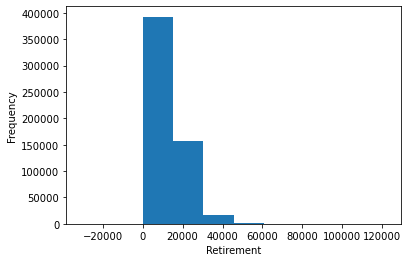

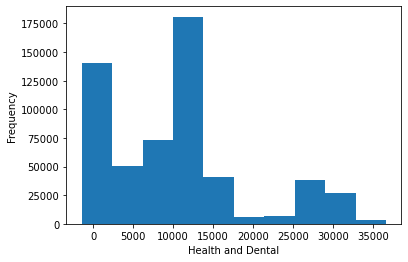

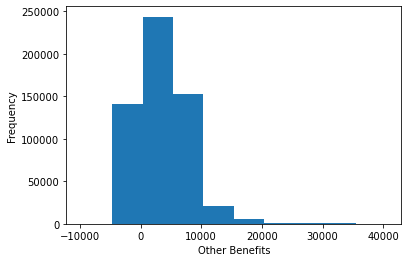

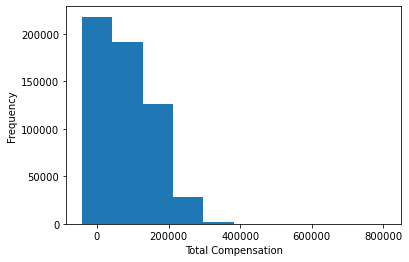

Year Type             0
Year                  0
Organization Group    0
Union                 0
Job Family            0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64

In [18]:
# to visualize distributions of the column(s) by plotting them.
import matplotlib.pyplot as plt    
def plot_distribution(kind_, df, col):
    """Plot distribution of the column(s).
    
    This function will plot a chart of the passed column as the 'kind' specified in kind_.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    knid_ -- 'kind' of chart that will be plotted
    df -- pandas dataframe which has the data
    col -- list of all the features for which we want to plot the distribution
    """
    df[col].plot(kind=kind_)
    plt.xlabel(col)
    plt.show()
plot_distribution("hist", df_train, 'Retirement')
plot_distribution("hist", df_train, 'Health and Dental')
plot_distribution("hist", df_train,  'Other Benefits')
plot_distribution("hist", df_train,  'Total Compensation')
df_train.isnull().sum()


In [19]:
df_train.head()

,Year Type,Year,Organization Group,Union,Job Family,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,5,0,78,23,0.00,13527.66,0.00,0.00
1,0,1,6,90,46,0.00,3995.56,875.27,16176.35
2,1,5,3,93,35,0.00,0.00,0.00,248.30
3,1,2,0,90,47,11671.59,10680.55,4400.24,80020.86
4,1,1,0,90,20,14617.66,12464.61,5562.09,101207.38


In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler=MinMaxScaler()
scaler1=StandardScaler()
#Transform on training data with columns of interest
def sqrt_trans(df,col):
    lst = []
    for i in df[col]:
        if i < 0:
            #temp = np.sqrt(abs(i))
            lst.append(-np.sqrt(abs(i)))
        else:
            #temp = np.sqrt(i)
            lst.append(np.sqrt(i))
    df.loc[:,col] = lst
sqrt_trans(df_train,'Total Compensation')
sqrt_trans(df_train,'Retirement')
sqrt_trans(df_train,'Health and Dental')
sqrt_trans(df_train,'Other Benefits')
df_train.isnull().sum()    


Year Type             0
Year                  0
Organization Group    0
Union                 0
Job Family            0
Retirement            0
Health and Dental     0
Other Benefits        0
Total Compensation    0
dtype: int64

In [21]:
df_train.head()

,Year Type,Year,Organization Group,Union,Job Family,Retirement,Health and Dental,Other Benefits,Total Compensation
0,0,5,0,78,23,0.000000,116.308469,0.000000,0.000000
1,0,1,6,90,46,0.000000,63.210442,29.584962,127.186281
2,1,5,3,93,35,0.000000,0.000000,0.000000,15.757538
3,1,2,0,90,47,108.035133,103.346746,66.334305,282.879586
4,1,1,0,90,20,120.903515,111.645018,74.579421,318.131074


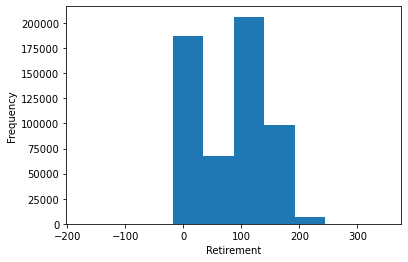

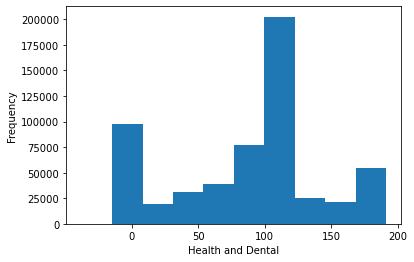

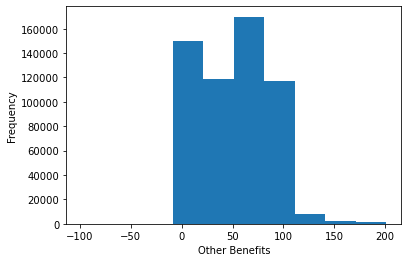

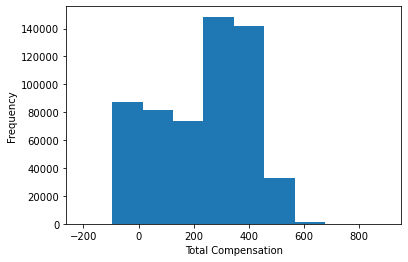

In [22]:
import matplotlib.pyplot as plt    
def plot_distribution(kind_, df, col):
    """Plot distribution of the column(s).
    
    This function will plot a chart of the passed column as the 'kind' specified in kind_.
    You can pass multiple columns to this function.
        
    Keyword arguments:
    knid_ -- 'kind' of chart that will be plotted
    df -- pandas dataframe which has the data
    col -- list of all the features for which we want to plot the distribution
    """
    df[col].plot(kind=kind_)
    plt.xlabel(col)
    plt.show()
plot_distribution("hist", df_train, 'Retirement')
plot_distribution("hist", df_train, 'Health and Dental')
plot_distribution("hist", df_train,  'Other Benefits')
plot_distribution("hist", df_train,  'Total Compensation')

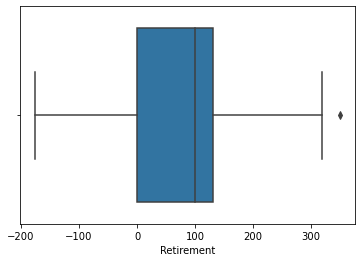

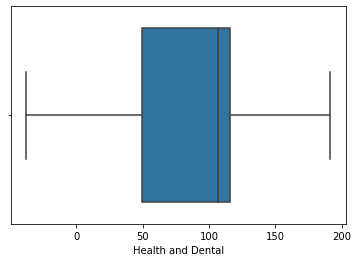

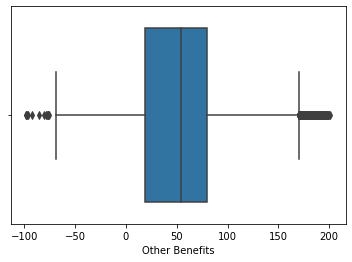

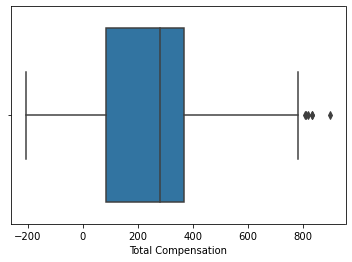

In [23]:
# to check outliers using box plot
import seaborn as sns
def check_outliers(df, col):
    """Check outliers through boxplot.
    
    This function plots and displays the boxplot of the feature col vs all the categories defined. 
    Check for any outlier present.
        
    Keyword arguments:
    df -- pandas dataframe which has the data
    col -- the feature for which we want to plot the boxplot
    cat -- the list of features (categorical) by which we want to check the outliers (for each category in each feature)
    """
    for i in range(len(col)):
        sns.boxplot(df[col[i]])
        plt.show()
check_outliers(df_train,['Retirement', 'Health and Dental','Other Benefits','Total Compensation'])    
#check_outliers(df_train,['Retirement', 'Health and Dental','Total Compensation'])    



In [24]:
df_train=df_train[(df_train['Other Benefits']> -70) & (df_train['Other Benefits']<190)]

In [25]:
df_train=df_train[df_train['Total Compensation']<780]

In [26]:
df_train=df_train[df_train['Retirement']<300]

In [27]:
df_train.shape

(566991, 9)

### Model building

- Separate the features and target.
- Now let's come to the actual task, using linear regression, predict the `Total Compensation`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. Call the `fit_model()` with respective parameters.



In [42]:
#X=train.drop('Total Compensation',axis=1)
#y=train['Total Compensation']

X=df_train.drop('Total Compensation',axis=1)
y=df_train['Total Compensation']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=6)
# Code ends here
X_train.isnull().sum()

Year Type             0
Year                  0
Organization Group    0
Union                 0
Job Family            0
Retirement            0
Health and Dental     0
Other Benefits        0
dtype: int64

In [43]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
score = r2_score(y_test,y_pred)
print(score)

0.9380536867605496


In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
# make pipeline for second degree polynomialfeatures
model = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Fit the model on training set
model.fit(X_train, y_train)

# predict the model performance
y_pred = model.predict(X_test)

# calculate r2 score
r2_poly= r2_score(y_test,y_pred)

# print r2 score
print(r2_poly)

0.9793913636067235


In [45]:
lasso = Lasso()
lasso.fit(X_train,y_train)

pred_lasso = lasso.predict(X_test)

score_lasso = r2_score(y_test,pred_lasso)
score_lasso

0.9378190786093882

In [46]:
ridge = Ridge()
ridge.fit(X_train,y_train)

pred_ridge = ridge.predict(X_test)

score_ridge = r2_score(y_test,pred_ridge)
score_ridge

0.9380536865689881

lst = []
for i in validation_pred:
    if i < 0:
        lst.append(-(i**2))
    else:
        lst.append(i**2)

rescaled_pred = np.array(lst)
rescaled_pred

### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [47]:
# Code Starts here
df_test=pd.read_csv("test.csv")
df_test.isnull().sum()
df_test.shape

# Code ends here

(177220, 12)

In [48]:
Id=df_test['Id']

In [49]:
df_test.drop(["Id","Department",'Job',"Employee Identifier"],axis=1,inplace=True)

In [ ]:
df_test.head()

In [50]:
treat_null_values(df_test)   

In [ ]:
df_test.info()

In [51]:
le=LabelEncoder()  
df_test['Union']=df_test['Union'].astype('str')
encode_category(df_test,le,['Year','Year Type','Organization Group', 'Union', 'Job Family']) 

df_test = pd.concat([pd.get_dummies(df_test ['Organization Group']), train], axis = 1)
df_test  = pd.concat([pd.get_dummies(df_test ['Job Family']), train], axis = 1)
df_test  = pd.concat([pd.get_dummies(df_test ['Union']), train], axis = 1)
df_test  = pd.concat([pd.get_dummies(df_test ['Year']), train], axis = 1)
df_test  = pd.concat([pd.get_dummies(df_test ['Year Type']), train], axis = 1)

df_test .drop(['Year', 'Organization Group','Union','Job Family','Year Type'],axis = 1, inplace = True)

In [52]:
clean_dollar(df_test,['Retirement', 'Health and Dental', 'Other Benefits'])    

In [ ]:
df_test.isnull().sum()

In [ ]:
#df_test=df_test[(df_test['Other Benefits']> -70) & (df_test['Other Benefits']<190)]
#df_test=df_test[df_test['Retirement']<300]

In [53]:
sqrt_trans(df_test,'Retirement')
sqrt_trans(df_test,'Health and Dental')
sqrt_trans(df_test,'Other Benefits')

In [ ]:
df_test.shape

In [54]:
final_pred = model.predict(df_test)
final_pred

array([ 18.97655494, 347.61611652, 303.05375758, ..., 218.67649256,
       292.98337309, 336.18263448])

In [55]:
lst = []
for i in final_pred:
    if i < 0:
        lst.append(-(i**2))
    else:
        lst.append(i**2)

rescaled_pred = np.array(lst)
rescaled_pred

array([   360.10963723, 120836.96446691,  91841.57998123, ...,
        47819.40840035,  85839.25690538, 113018.7637231 ])

In [56]:
sample_submission = pd.DataFrame({'Id':Id,'Total Compensation':rescaled_pred})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission_3.csv',index=False)